In [36]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from tqdm import tqdm
tqdm.pandas()

In [37]:
# Set pandas to show all columns on functions like df.head()

pd.options.display.max_columns = None
pd.options.display.max_rows = None

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [38]:
! pip install matplotlib
!pip install wordcloud

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
DIRETORIO_COHEBERT = "data"

DIRETORIO_LOCAL = "/content/" + DIRETORIO_COHEBERT + "/"

# Diretório no google drive com os arquivos pré-processados
DIRETORIO_DRIVE = "/content/drive/MyDrive/Colab Notebooks/1_Experimentos _ Iniciais/" + DIRETORIO_COHEBERT

NOME_ARQUIVO_INPUT = '2023-09-28_redacoes_tema_texto_motivador_categoria.csv'

In [41]:
df=pd.read_csv(f"{DIRETORIO_DRIVE}/{NOME_ARQUIVO_INPUT}")
df.sample(5)

,id,redacao,nota_competencia_2,nota_geral,tema,texto_motivador,categoria,sentencas_redacao,sentencas_texto_motivador,qtd_sentencas_redacao,qtd_sentencas_texto_motivador,redacao_bert_tokens,texto_motivador_bert_tokens,qtd_bert_tokens_redacao,qtd_bert_texto_motivador,len_redacao,len_texto_motivador,tokens_sentencas_redacao,tokens_sentencas_texto_motivador,tokens_sentencas_tema,avg_len_sentencas_redacao,avg_len_sentencas_texto_motivador,avg_bert_tokens_sentencas_texto_motivador,avg_bert_tokens_sentencas_redacao
3677,3714,o sistema único de saúde (sus) é um dos maiore...,160,760,sus: desafios e importância da saúde pública n...,o sistema único de saúde (sus) é a denominação...,saúde,['o sistema único de saúde (sus) é um dos maio...,['o sistema único de saúde (sus) é a denominaç...,10,24,"['[CLS]', 'o', 'sistema', 'único', 'de', 'saúd...","['[CLS]', 'o', 'sistema', 'único', 'de', 'saúd...",489,808,2429,3768,"[['[CLS]', 'o', 'sistema', 'único', 'de', 'saú...","[['[CLS]', 'o', 'sistema', 'único', 'de', 'saú...","['[CLS]', 'sus', ':', 'desafios', 'e', 'import...",242.90,157.00,35.58,50.70
4893,5006,"de acordo com aristóteles ""a base da sociedade...",120,680,conscientização da população para o isolamento...,texto 1: um estudo da universidade estadual de...,sociedade e cultura,"['de acordo com aristóteles ""a base da socieda...",['texto 1: um estudo da universidade estadual ...,11,12,"['[CLS]', 'de', 'acordo', 'com', 'ar', '##ist'...","['[CLS]', 'texto', '1', ':', 'um', 'estudo', '...",355,463,1619,2242,"[['[CLS]', 'de', 'acordo', 'com', 'ar', '##ist...","[['[CLS]', 'texto', '1', ':', 'um', 'estudo', ...","['[CLS]', 'consci', '##ent', '##ização', 'da',...",147.18,186.83,40.42,34.09
2553,2557,todos os seres humanos nascem livres e iguais....,160,680,privatização do saneamento básico,privatização é um processo da concessão ou ven...,sociedade e cultura,['todos os seres humanos nascem livres e iguai...,['privatização é um processo da concessão ou v...,11,20,"['[CLS]', 'todos', 'os', 'seres', 'humanos', '...","['[CLS]', 'priva', '##tização', 'é', 'um', 'pr...",355,641,1751,2916,"[['[CLS]', 'todos', 'os', 'seres', 'humanos', ...","[['[CLS]', 'priva', '##tização', 'é', 'um', 'p...","['[CLS]', 'priva', '##tização', 'do', 'san', '...",159.18,145.80,33.95,34.09
4800,4913,o estigma associado s doenças mentais é um pro...,160,840,o estigma associado a doenças mentais na socie...,"texto i: a maior parte das pessoas, quando ouv...",saúde,['o estigma associado s doenças mentais é um p...,"['texto i: a maior parte das pessoas, quando o...",12,14,"['[CLS]', 'o', 'esti', '##gma', 'associado', '...","['[CLS]', 'texto', 'i', ':', 'a', 'maior', 'pa...",471,425,2309,2088,"[['[CLS]', 'o', 'esti', '##gma', 'associado', ...","[['[CLS]', 'texto', 'i', ':', 'a', 'maior', 'p...","['[CLS]', 'o', 'esti', '##gma', 'associado', '...",192.42,149.14,32.21,41.08
328,328,o fim da obrigatóriedade das disciplinas educa...,120,440,artes e educação física: opcionais ou obrigató...,"no mês de setembro passado, o governo federal ...",educação,['o fim da obrigatóriedade das disciplinas edu...,"['no mês de setembro passado, o governo federa...",1,32,"['[CLS]', 'o', 'fim', 'da', 'obriga', '##tó', ...","['[CLS]', 'no', 'mês', 'de', 'setembro', 'pass...",208,987,1063,4813,"[['[CLS]', 'o', 'fim', 'da', 'obriga', '##tó',...","[['[CLS]', 'no', 'mês', 'de', 'setembro', 'pas...","['[CLS]', 'artes', 'e', 'educação', 'física', ...",1063.00,150.41,32.78,208.00


# Filtra redacoes e textos motivadores com menos de 500 tokens

In [42]:
df=df[(df.qtd_bert_texto_motivador <= 500) & (df.qtd_bert_tokens_redacao <= 500)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2653 entries, 38 to 6453
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   id                                         2653 non-null   int64  
 1   redacao                                    2653 non-null   object 
 2   nota_competencia_2                         2653 non-null   int64  
 3   nota_geral                                 2653 non-null   int64  
 4   tema                                       2653 non-null   object 
 5   texto_motivador                            2653 non-null   object 
 6   categoria                                  2653 non-null   object 
 7   sentencas_redacao                          2653 non-null   object 
 8   sentencas_texto_motivador                  2653 non-null   object 
 9   qtd_sentencas_redacao                      2653 non-null   int64  
 10  qtd_sentencas_texto_mot

# Estatística descritiva

## Informações gerais sobre o dataset

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2653 entries, 38 to 6453
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   id                                         2653 non-null   int64  
 1   redacao                                    2653 non-null   object 
 2   nota_competencia_2                         2653 non-null   int64  
 3   nota_geral                                 2653 non-null   int64  
 4   tema                                       2653 non-null   object 
 5   texto_motivador                            2653 non-null   object 
 6   categoria                                  2653 non-null   object 
 7   sentencas_redacao                          2653 non-null   object 
 8   sentencas_texto_motivador                  2653 non-null   object 
 9   qtd_sentencas_redacao                      2653 non-null   int64  
 10  qtd_sentencas_texto_mot

## Correlação entre a nota na competência 2 e a nota final

- Positiva

Quanto mais próximo de 1 o valor da correlação sugere que o quanto mais alta a nota na `competência 2` **mais alto** o valor da `nota final`.

- Negativa

Quanto mais próximo de `-1` a correlação sugere que quanto mais alto o valor ne `competência 2` **mais baixo** o valor da `nota final`


- Neutra

Quanto mais próximo de `0` o valor indica que não há correlação entre as variáveis.

In [44]:
df_s = df[['nota_competencia_2', 'nota_geral']]
corr = df_s.corr()
corr.style.background_gradient(cmap='coolwarm')

,nota_competencia_2,nota_geral
nota_competencia_2,1.000000,0.831454
nota_geral,0.831454,1.000000


<Axes: xlabel='nota_competencia_2', ylabel='nota_geral'>

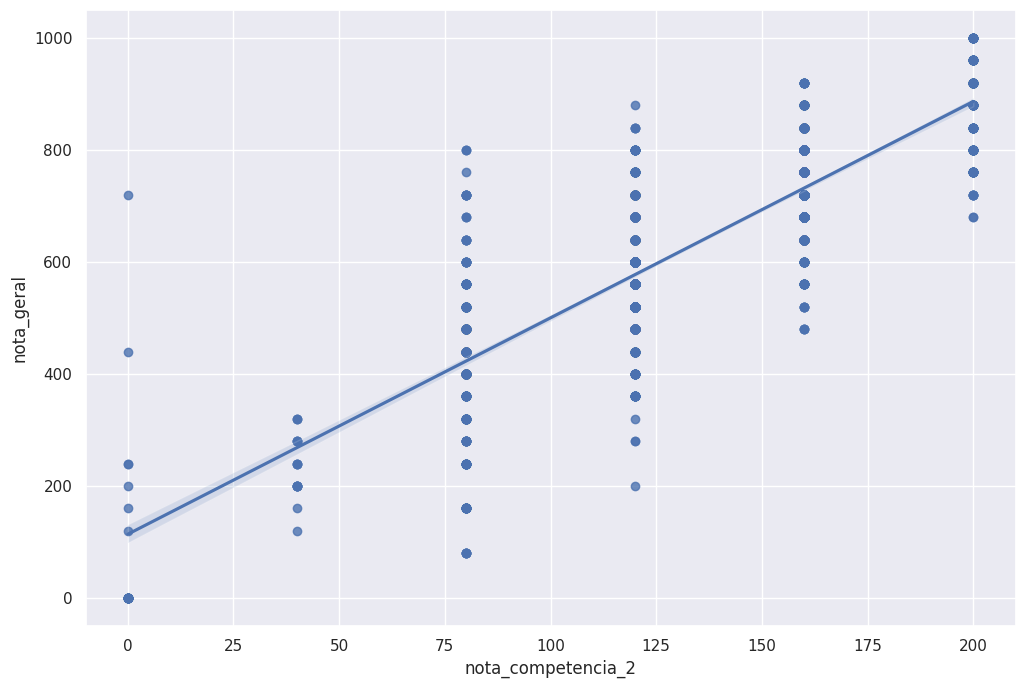

In [45]:
sns.regplot(x=df_s['nota_competencia_2'], y=df_s['nota_geral'])

# Distribuição de categorias de temas



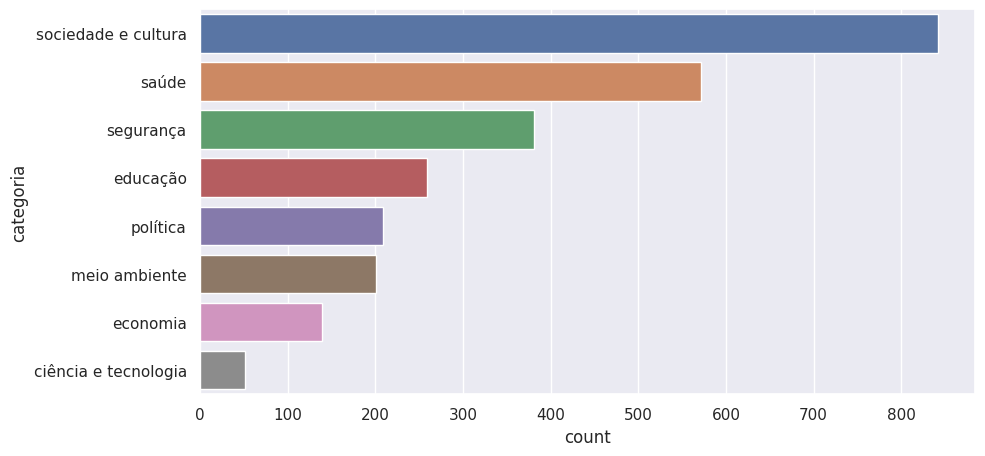

In [46]:
sns.set(style="darkgrid")
plt.rcParams["figure.figsize"] = (10,5)

sns.countplot(y='categoria', data=df, order=df['categoria'].value_counts().index)
plt.show()

# ordernar por incidencia

# Estatísticas descritivas para nota na competência 2 e nota final

In [47]:
df['nota_competencia_2'].describe()

count   2653.00
mean     130.48
std       36.16
min        0.00
25%      120.00
50%      120.00
75%      160.00
max      200.00
Name: nota_competencia_2, dtype: float64

In [48]:
df['nota_geral'].describe()

count   2653.00
mean     618.00
std      168.02
min        0.00
25%      520.00
50%      600.00
75%      720.00
max     1000.00
Name: nota_geral, dtype: float64

# Análise comparativa entre nota na competência 2 e categorias de temas



In [49]:
df[['nota_competencia_2', 'categoria']].groupby('categoria').mean().sort_values(by='nota_competencia_2',ascending=False)

,nota_competencia_2
categoria,
saúde,136.88
segurança,135.54
meio ambiente,134.13
educação,127.88
economia,127.48
sociedade e cultura,126.46
política,124.02
ciência e tecnologia,120.78


In [50]:
print(df.categoria.value_counts().index.tolist())

['sociedade e cultura', 'saúde', 'segurança', 'educação', 'política', 'meio ambiente', 'economia', 'ciência e tecnologia']


<Axes: xlabel='nota_competencia_2', ylabel='categoria'>

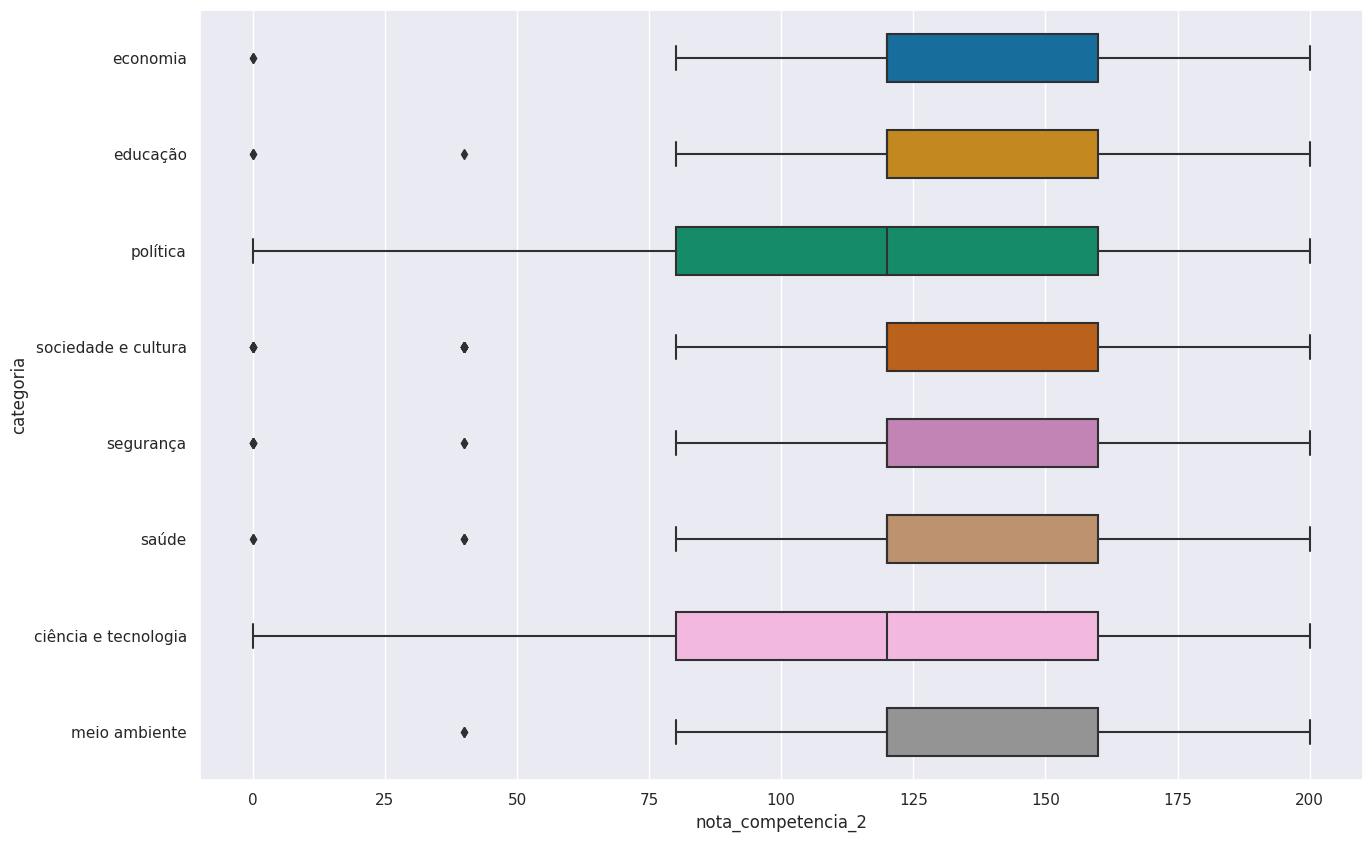

In [51]:
fig, ax = plt.subplots(figsize =(15, 10))

sns.set_style("whitegrid")
sns.boxplot(y='categoria', x='nota_competencia_2', data=df, width=0.5, palette='colorblind')

# rever, parece estranho

# Análise comparativa entre nota geral e categorias de temas

In [52]:
df[['nota_geral', 'categoria']].groupby('categoria').mean().sort_values(by='nota_geral',ascending=False)

,nota_geral
categoria,
saúde,665.15
segurança,658.58
política,618.56
educação,605.71
meio ambiente,604.98
ciência e tecnologia,585.10
sociedade e cultura,583.23
economia,576.69


<Axes: xlabel='nota_geral', ylabel='categoria'>

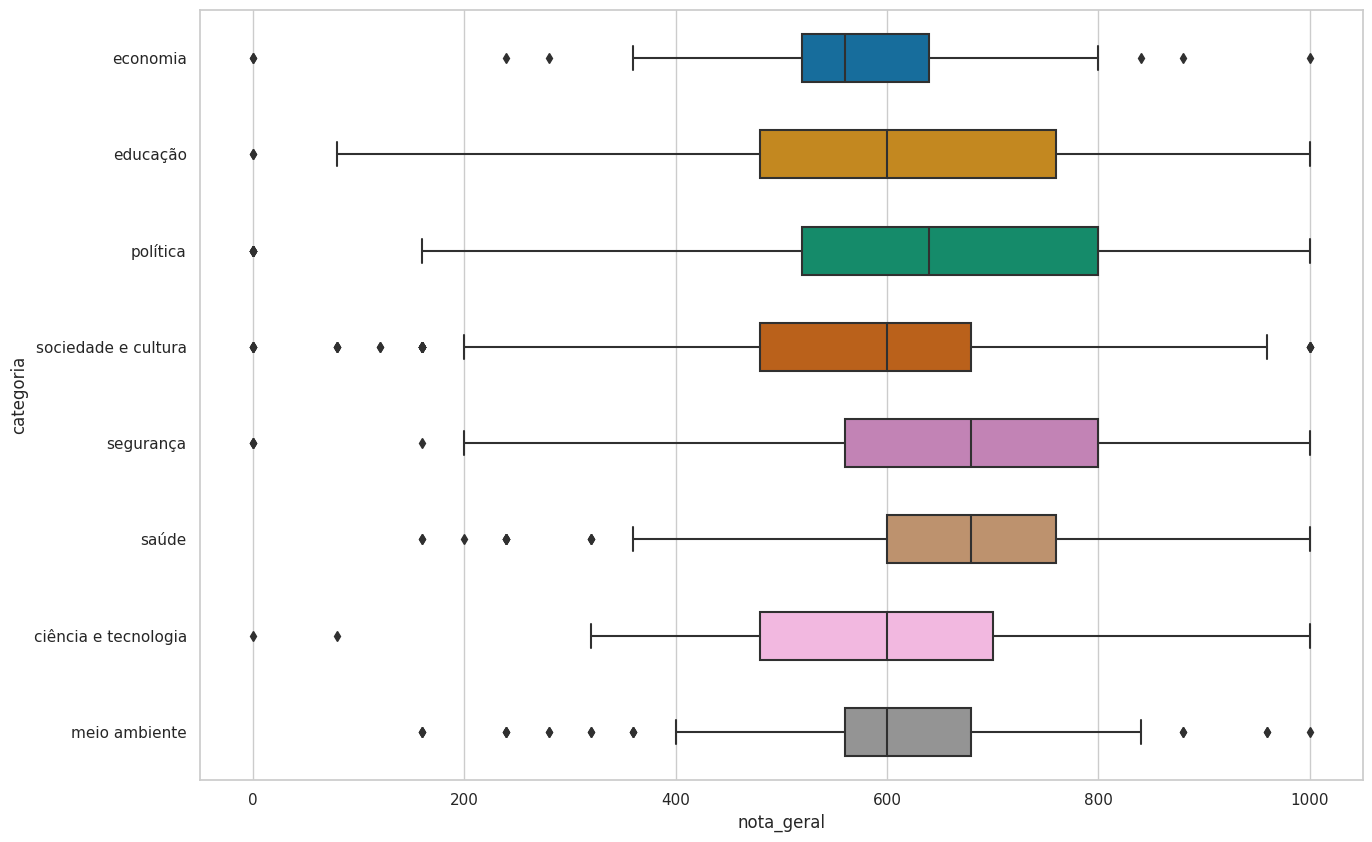

In [53]:
fig, ax = plt.subplots(figsize =(15, 10))

sns.set_style("whitegrid")
sns.boxplot(y='categoria', x='nota_geral', data=df, width=0.5, palette='colorblind')

# Histograma de notas na competência 2


([<matplotlib.axis.XTick at 0x7f102f95c130>,
 [Text(0, 0, '0'),
  Text(40, 0, '40'),
  Text(80, 0, '80'),
  Text(120, 0, '120'),
  Text(160, 0, '160'),
  Text(200, 0, '200')])

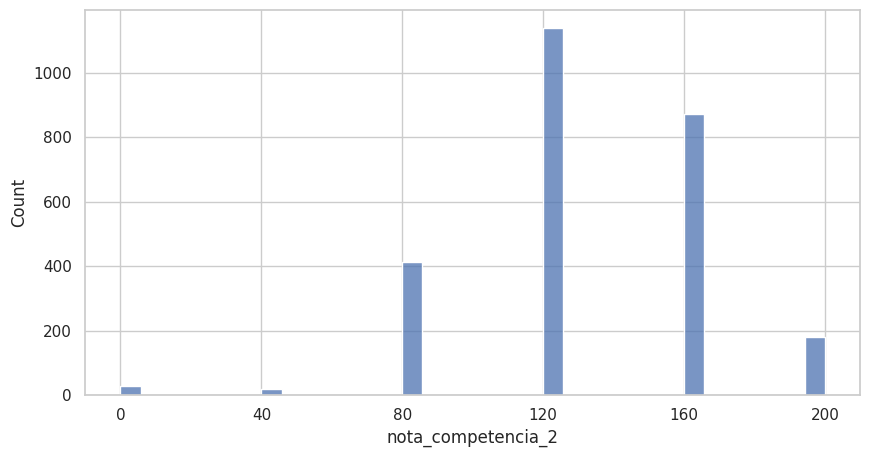

In [54]:
sns.histplot(data=df, x='nota_competencia_2')
plt.xticks([0, 40, 80, 120, 160, 200])

# Histograma de notas finais


<Axes: xlabel='nota_geral', ylabel='Count'>

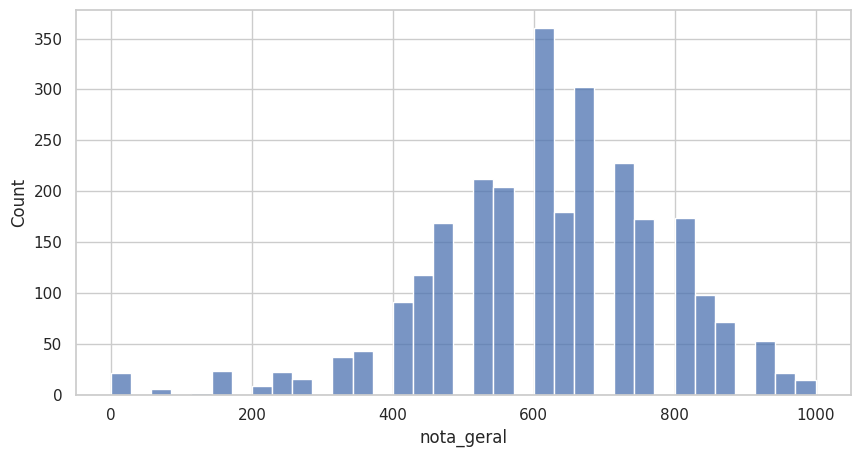

In [55]:
sns.histplot(data=df, x='nota_geral', legend=True)

# Análise de temas

porte de armas pela população civil                                                                135
coronavírus: a importância da ciência para a sociedade                                             101
reforma do ensino médio - uma solução ou um problema para a questão da educação no país?           100
impactos do uso das redes sociais na saúde mental                                                   89
desafios na educação a distância no brasil                                                          89
o estigma associado a doenças mentais na sociedade brasileira                                       88
fome: um retrato da desigualdade social no brasil                                                   87
projeto de lei de iniciativa popular                                                                84
caminhos para superar os desafios encontrados pelos negros atualmente                               82
parto humanizado: uma questão de saúde pública                           

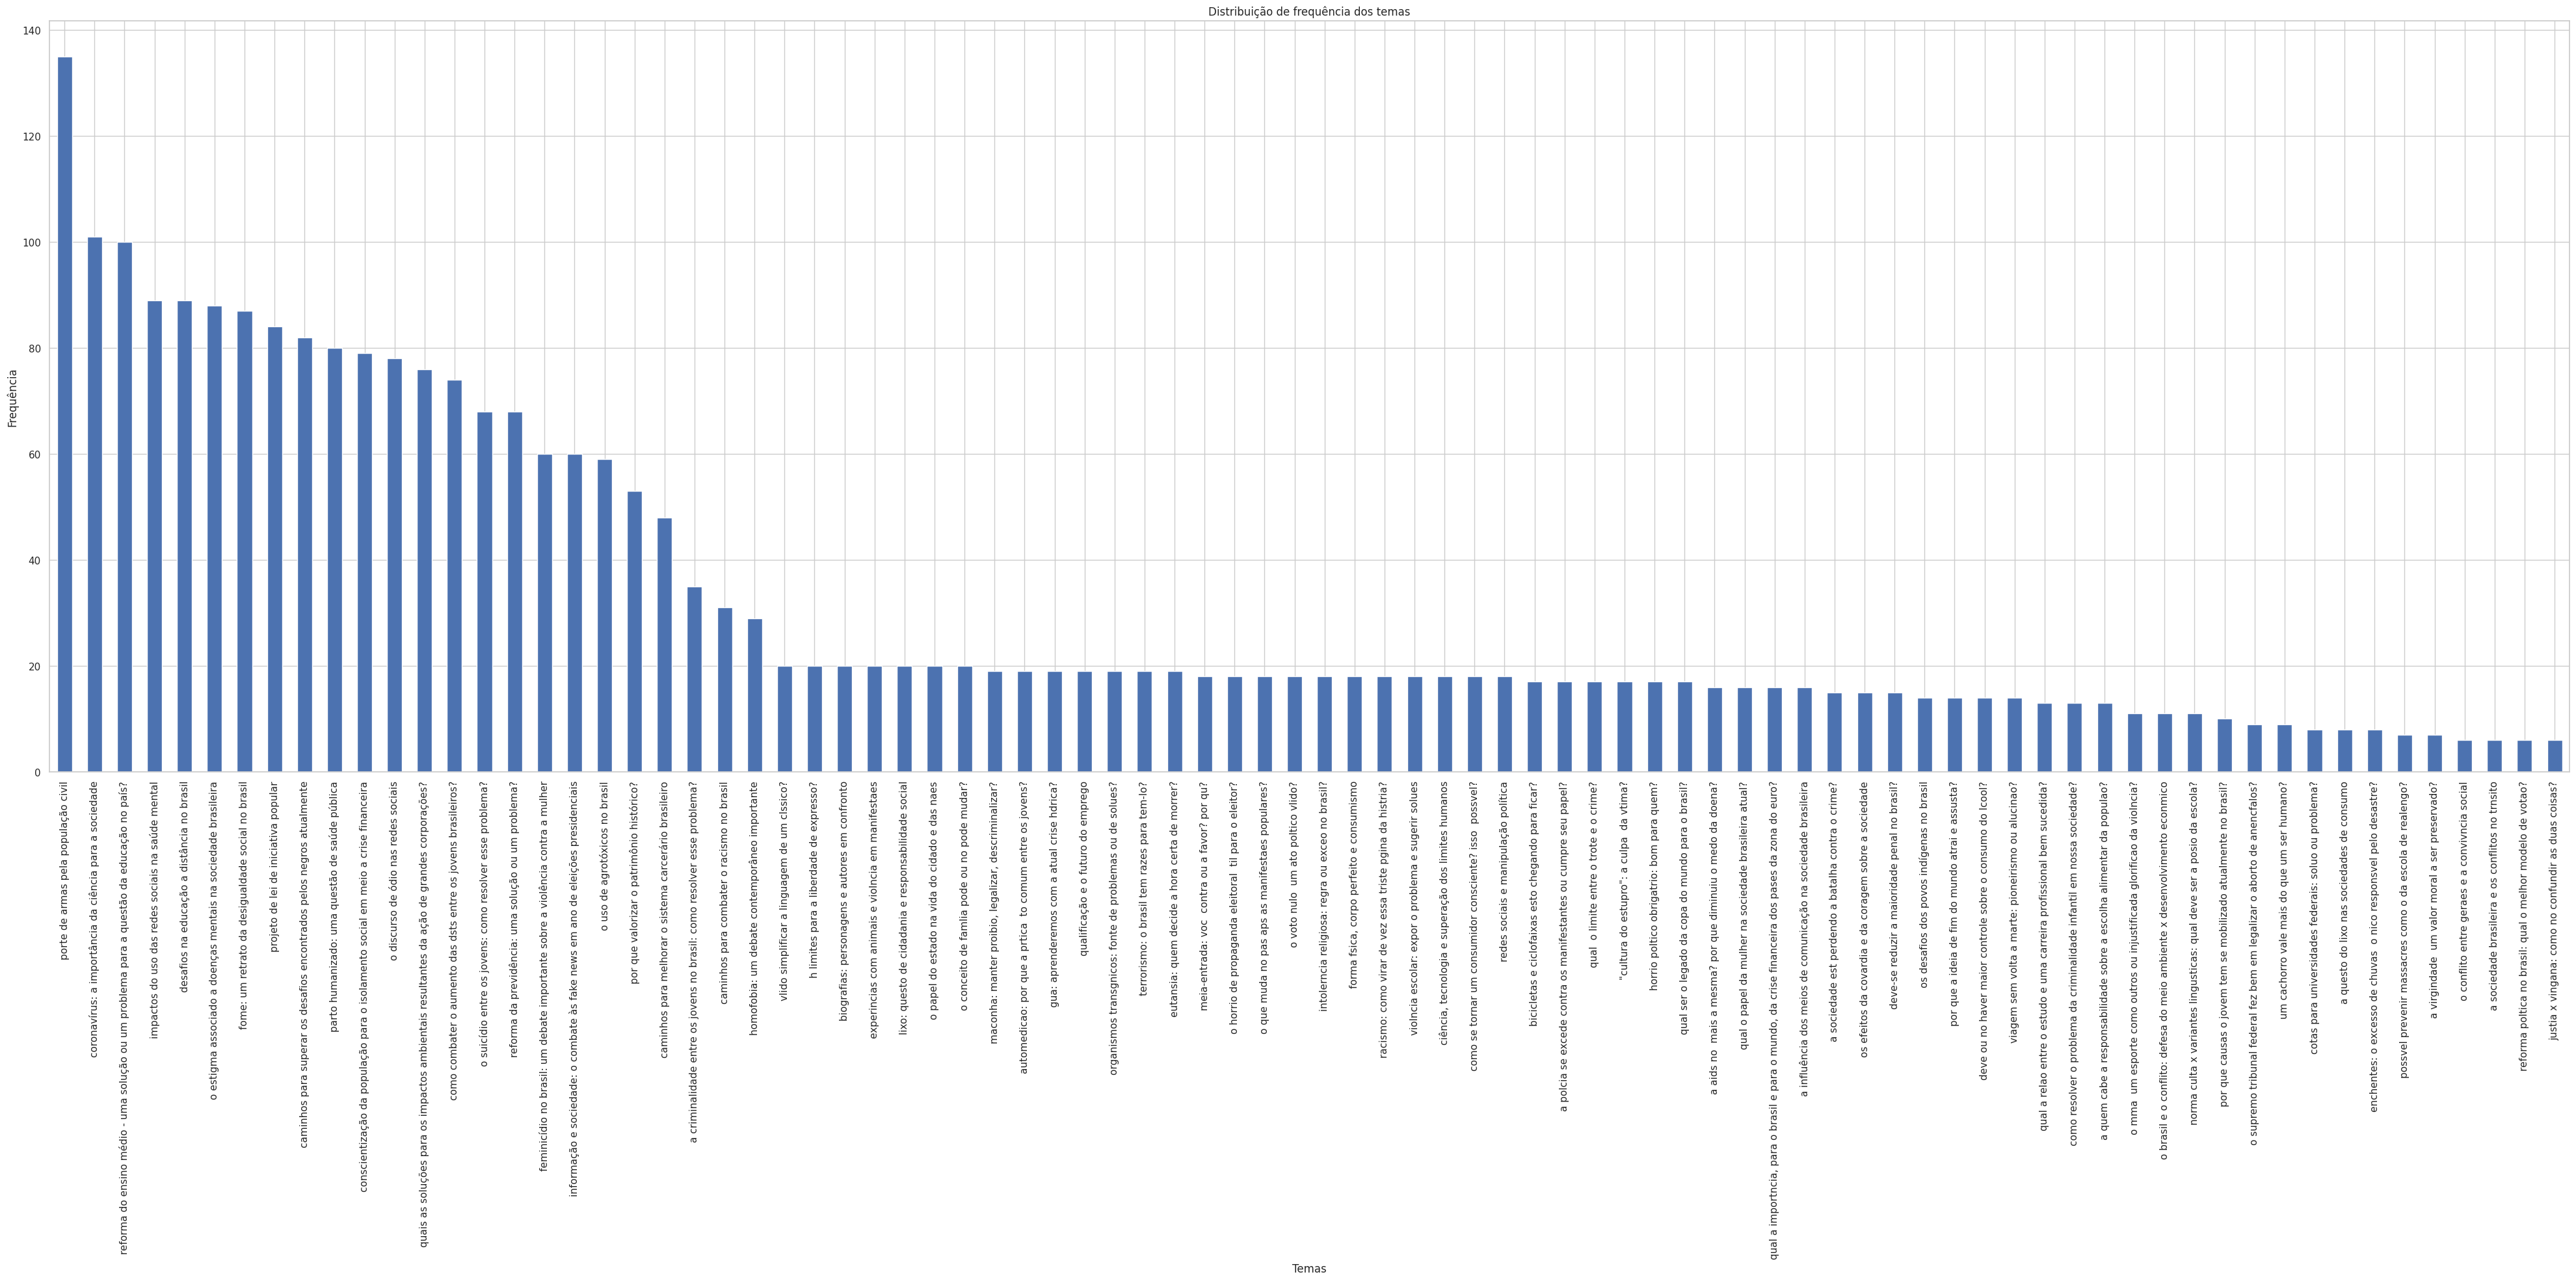

In [56]:
theme_counts = df['tema'].value_counts()
print(theme_counts)

theme_counts.plot(kind='bar', figsize=(50, 15))

plt.title('Distribuição de frequência dos temas')
plt.xlabel('Temas')
plt.ylabel('Frequência')
plt.show()

# Distribuição de temas por categoria

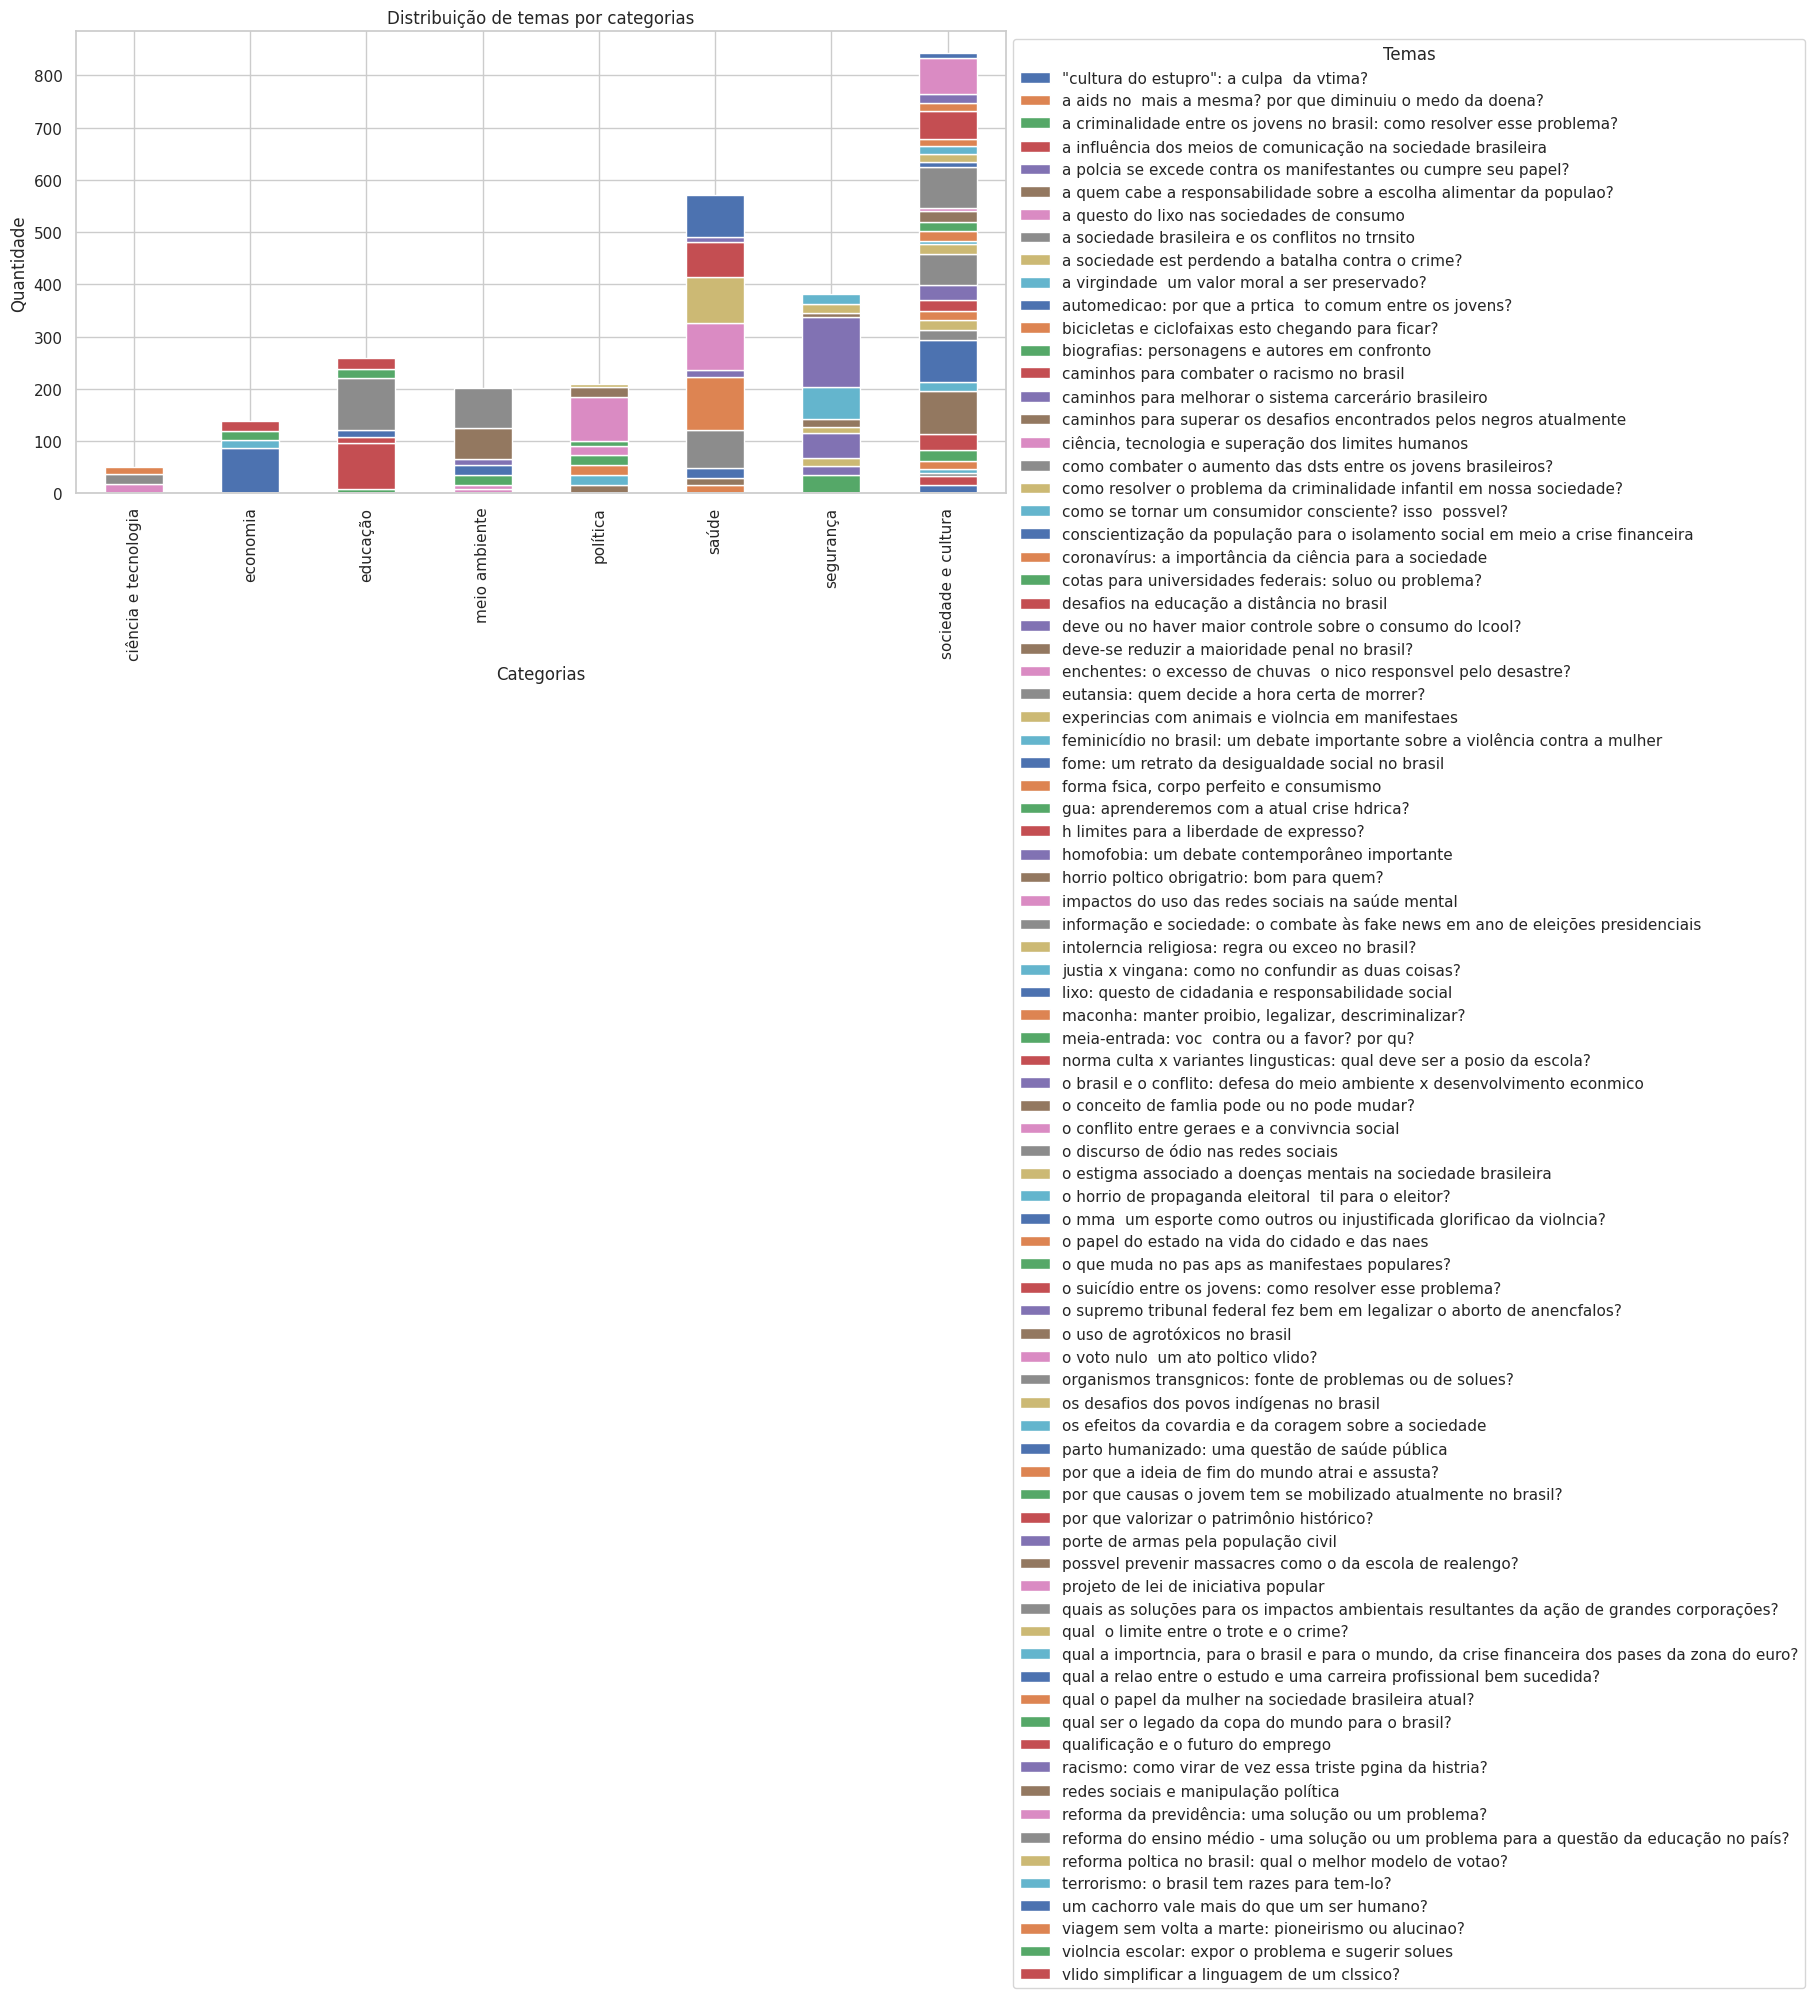

In [57]:
tema_categoria_counts = df.groupby(['categoria', 'tema']).size().reset_index(name='Count')
# print(tema_categoria_counts)

pivot_table = tema_categoria_counts.pivot(index='categoria', columns='tema', values='Count')

pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribuição de temas por categorias')
plt.xlabel('Categorias')
plt.ylabel('Quantidade')
plt.legend(title='Temas', bbox_to_anchor=(1,1))
plt.show()

# Distribuição da quantidade de sentenças por redação

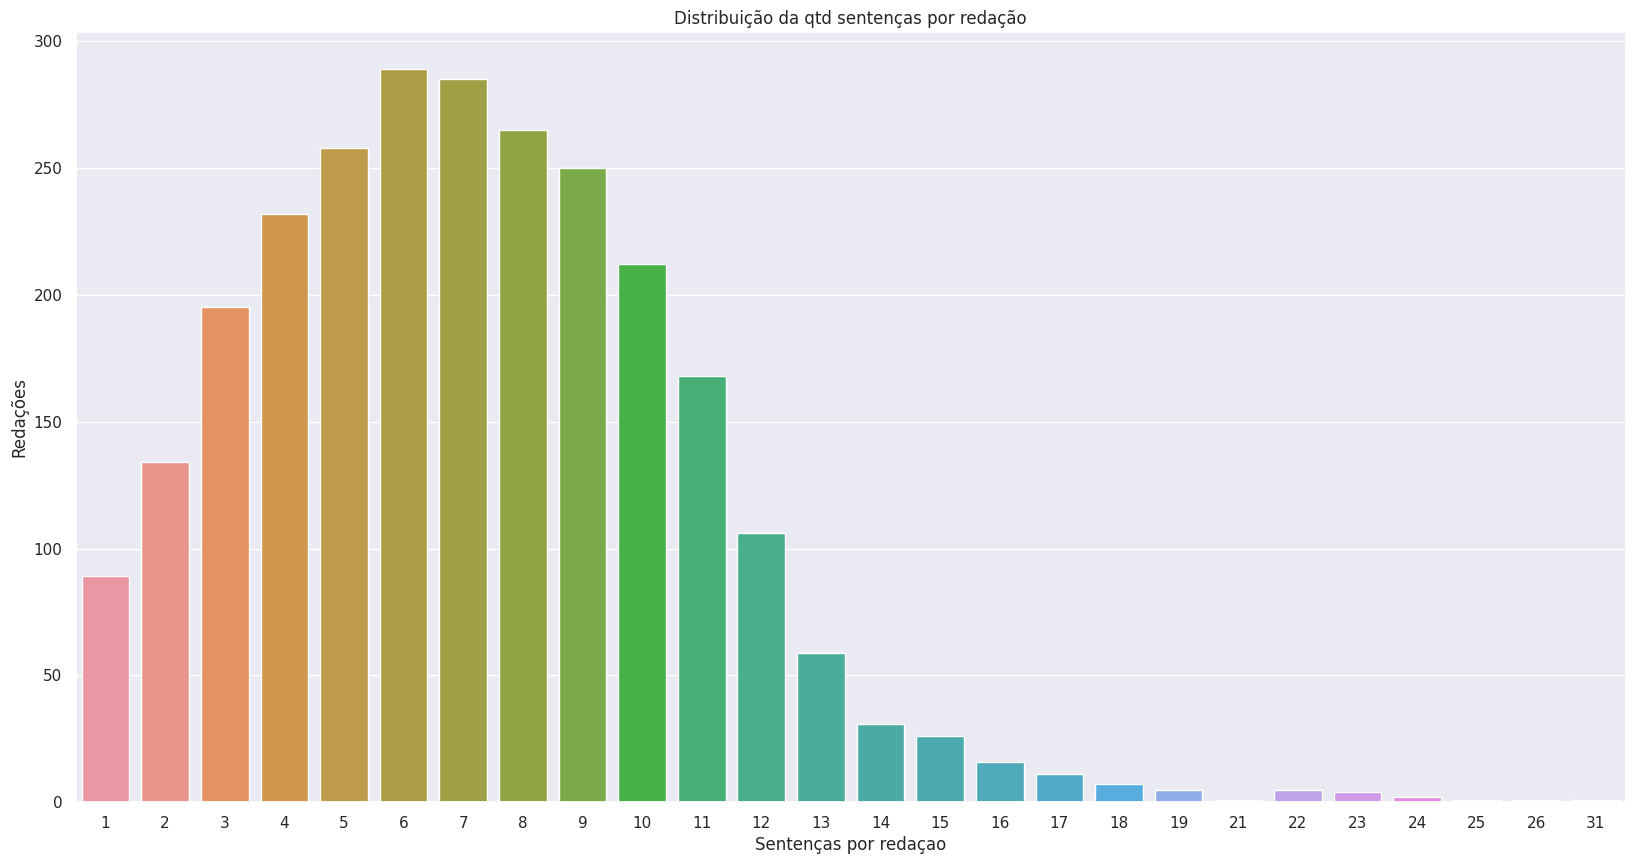

In [58]:
sns.set(style="darkgrid")

plt.rcParams["figure.figsize"] = (20,10)

ax = sns.countplot(x=df['qtd_sentencas_redacao'])

# Adiciona os valores as colunas
# for p in ax.patches:
#     ax.annotate(f"{p.get_height()}", (p.get_x()+0.3, p.get_height()+0.2))

plt.title("Distribuição da qtd sentenças por redação")
plt.xlabel("Sentenças por redaçao")
plt.ylabel("Redações")
plt.show()

In [59]:
df[df.qtd_sentencas_redacao > 30].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 4845 to 4845
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   id                                         1 non-null      int64  
 1   redacao                                    1 non-null      object 
 2   nota_competencia_2                         1 non-null      int64  
 3   nota_geral                                 1 non-null      int64  
 4   tema                                       1 non-null      object 
 5   texto_motivador                            1 non-null      object 
 6   categoria                                  1 non-null      object 
 7   sentencas_redacao                          1 non-null      object 
 8   sentencas_texto_motivador                  1 non-null      object 
 9   qtd_sentencas_redacao                      1 non-null      int64  
 10  qtd_sentencas_texto_moti

# Distribuição da quantidade de BERT tokens por redação

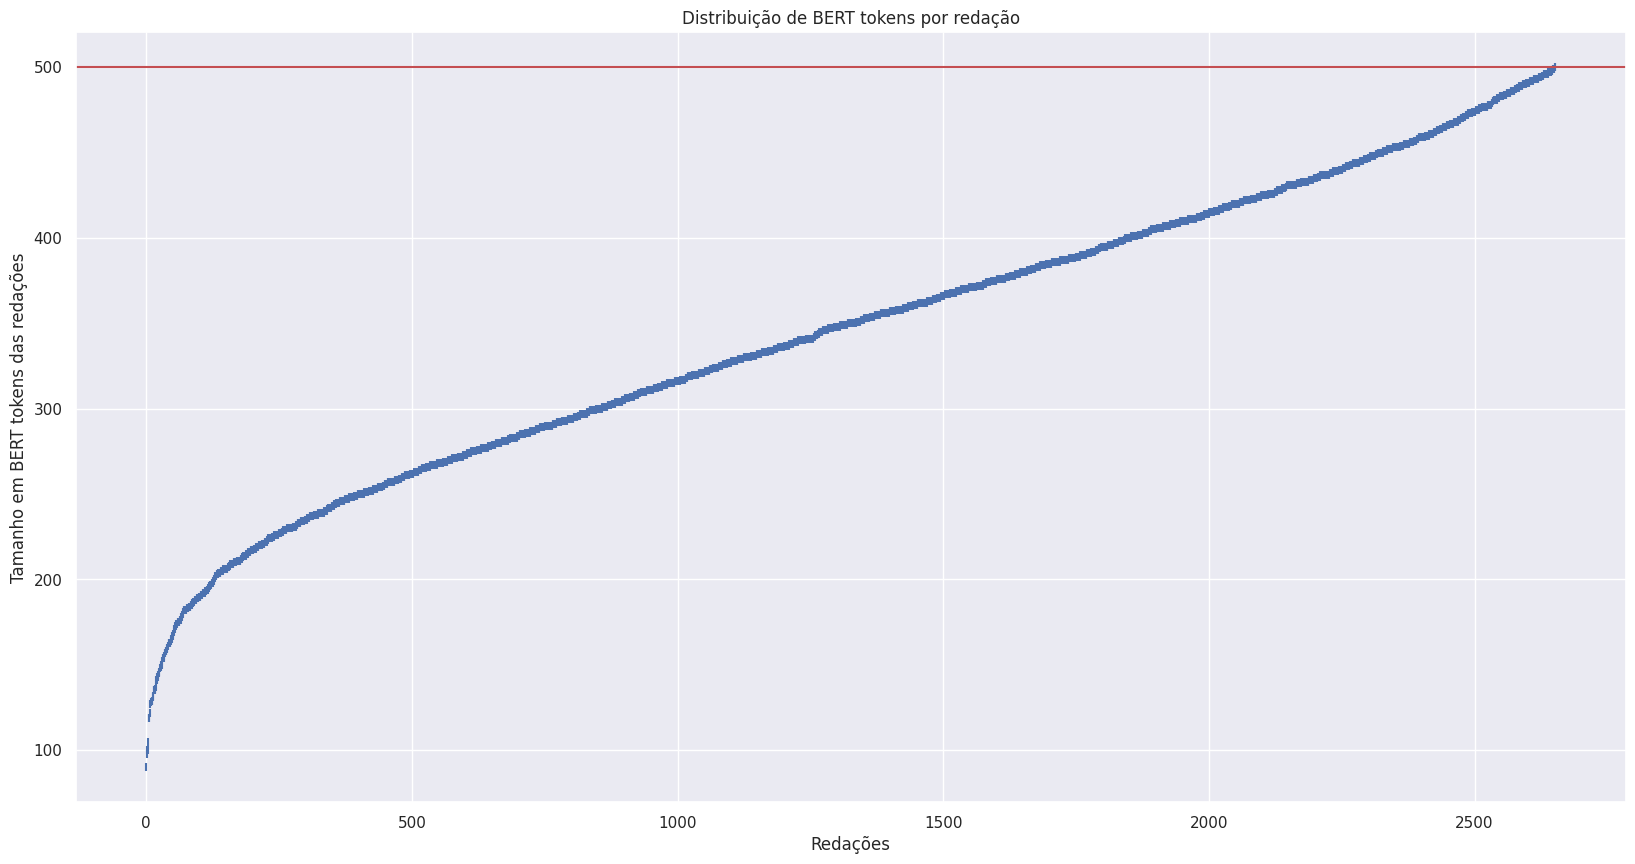

In [60]:
sns.set(style="darkgrid")

plt.rcParams["figure.figsize"] = (20,10)

plt.scatter(range(0, len(df['qtd_bert_tokens_redacao'])), sorted(df['qtd_bert_tokens_redacao']), marker="|")

plt.title("Distribuição de BERT tokens por redação")
plt.xlabel("Redações")
plt.ylabel("Tamanho em BERT tokens das redações")
plt.axhline(y=500, color='r', linestyle='-')
plt.show()

# ordear

# Distribuição do tamanho médio de sentenças tokenizadas em redações

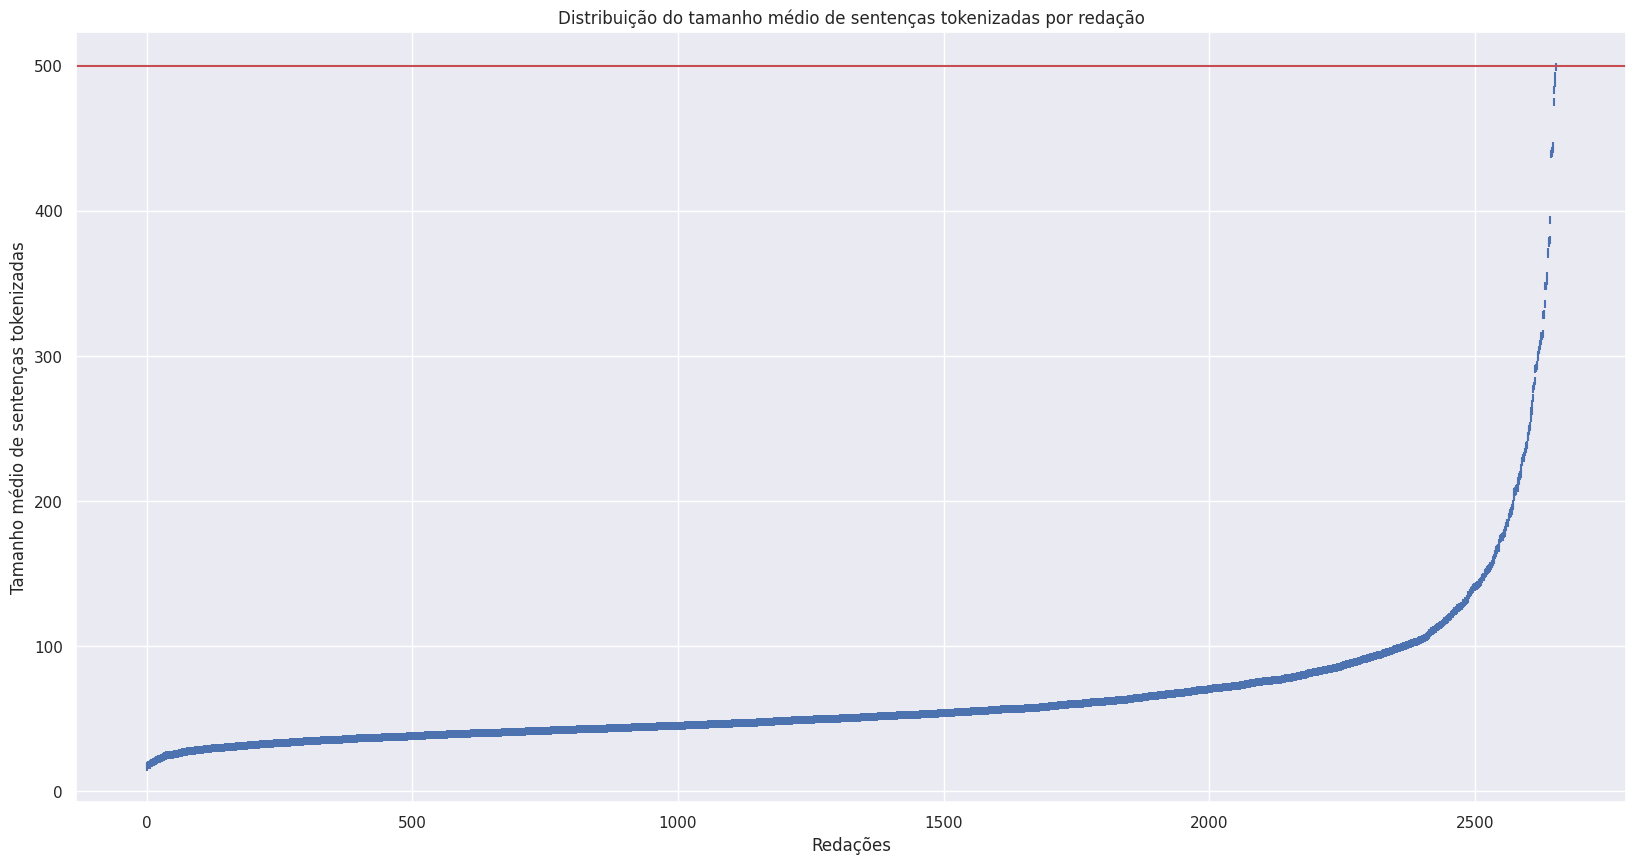

In [61]:
sns.set(style="darkgrid")

plt.rcParams["figure.figsize"] = (20,10)

plt.scatter(range(0, len(df['avg_bert_tokens_sentencas_redacao'])), sorted(df['avg_bert_tokens_sentencas_redacao']), marker="|")

plt.title("Distribuição do tamanho médio de sentenças tokenizadas por redação")
plt.xlabel("Redações")
plt.ylabel("Tamanho médio de sentenças tokenizadas")
plt.axhline(y=500, color='r', linestyle='-')
plt.show()

#

# Distribuição da quantidade de sentenças por texto motivador

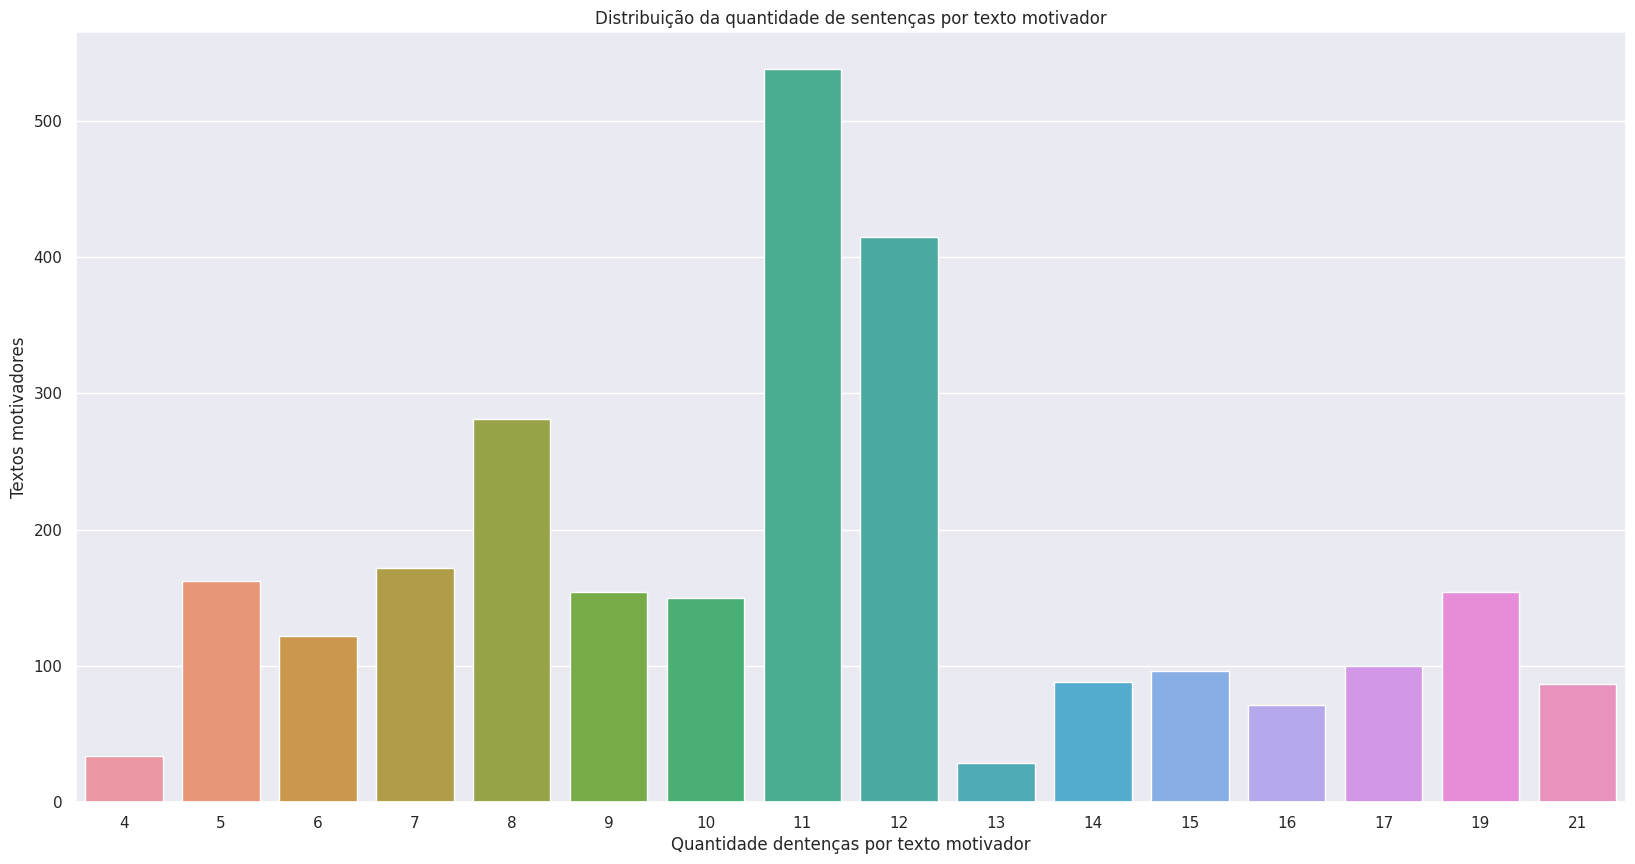

In [62]:
sns.set(style="darkgrid")

plt.rcParams["figure.figsize"] = (20,10)

ax = sns.countplot(x='qtd_sentencas_texto_motivador', data=df)

# Adiciona os valores as colunas
# for p in ax.patches:
#     ax.annotate(f"{p.get_height()}", (p.get_x()+0.3, p.get_height()+0.2))

plt.title("Distribuição da quantidade de sentenças por texto motivador")
plt.ylabel("Textos motivadores")
plt.xlabel("Quantidade dentenças por texto motivador")
plt.show()

In [63]:
df[df.qtd_sentencas_texto_motivador > 30].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   id                                         0 non-null      int64  
 1   redacao                                    0 non-null      object 
 2   nota_competencia_2                         0 non-null      int64  
 3   nota_geral                                 0 non-null      int64  
 4   tema                                       0 non-null      object 
 5   texto_motivador                            0 non-null      object 
 6   categoria                                  0 non-null      object 
 7   sentencas_redacao                          0 non-null      object 
 8   sentencas_texto_motivador                  0 non-null      object 
 9   qtd_sentencas_redacao                      0 non-null      int64  
 10  qtd_sentencas_texto_motivador         

# Distribuição da quantidade de BERT tokens por texto motivador

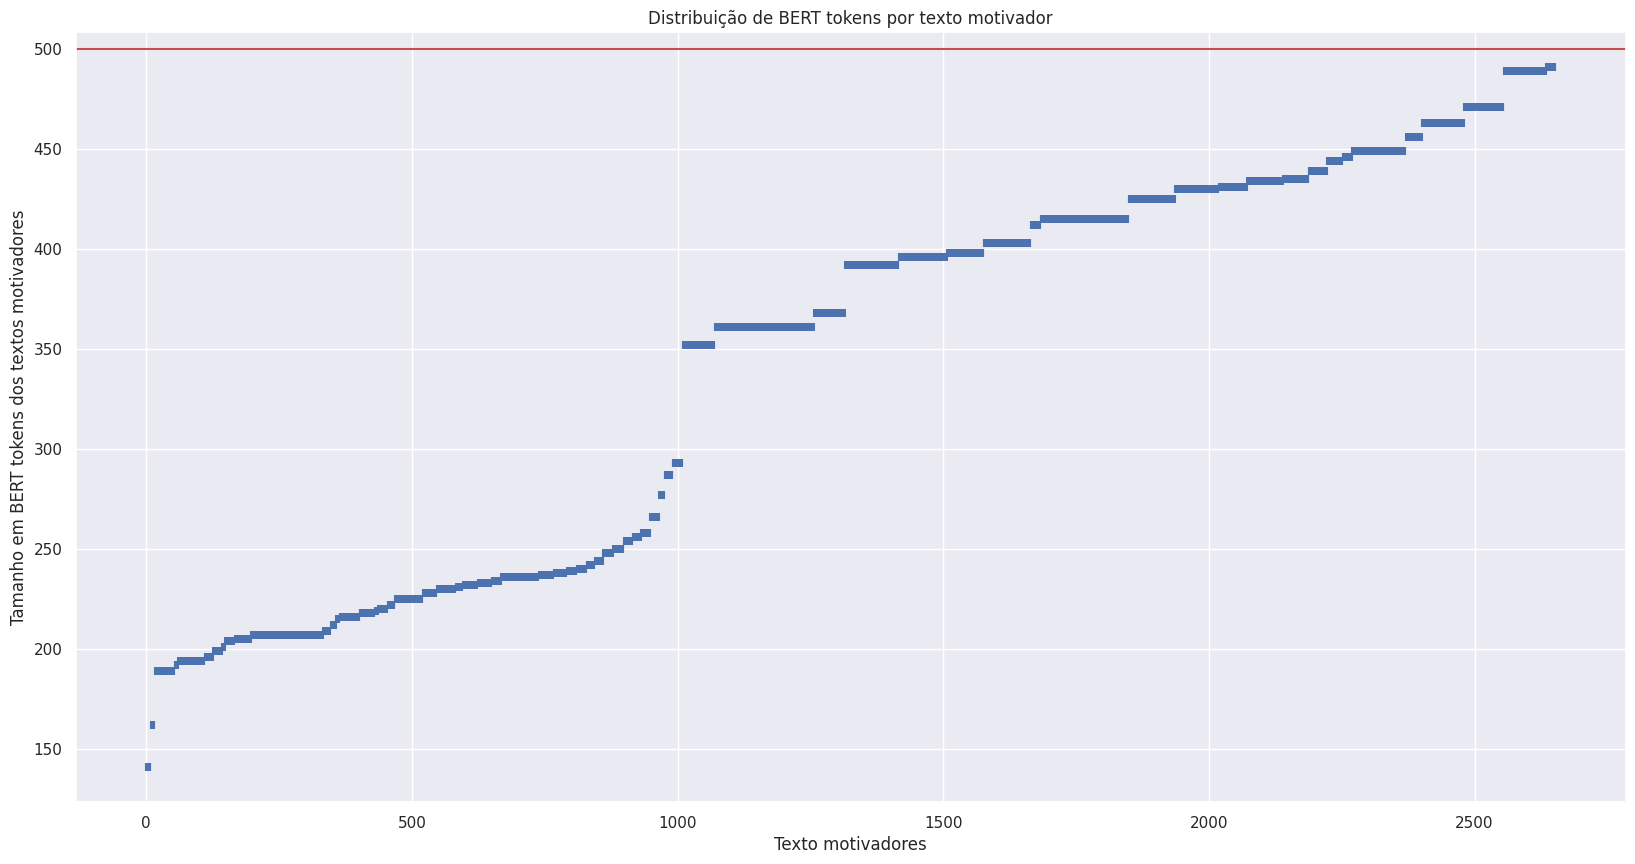

In [64]:
sns.set(style="darkgrid")

plt.rcParams["figure.figsize"] = (20,10)

plt.scatter(range(0, len(df['qtd_bert_texto_motivador'])), sorted(df['qtd_bert_texto_motivador']), marker="|")

plt.title("Distribuição de BERT tokens por texto motivador")
plt.xlabel("Texto motivadores")
plt.ylabel("Tamanho em BERT tokens dos textos motivadores")
plt.axhline(y=500, color='r', linestyle='-')
plt.show()

# Distribuição do tamanho médio de sentenças tokenizadas em textos motivadores

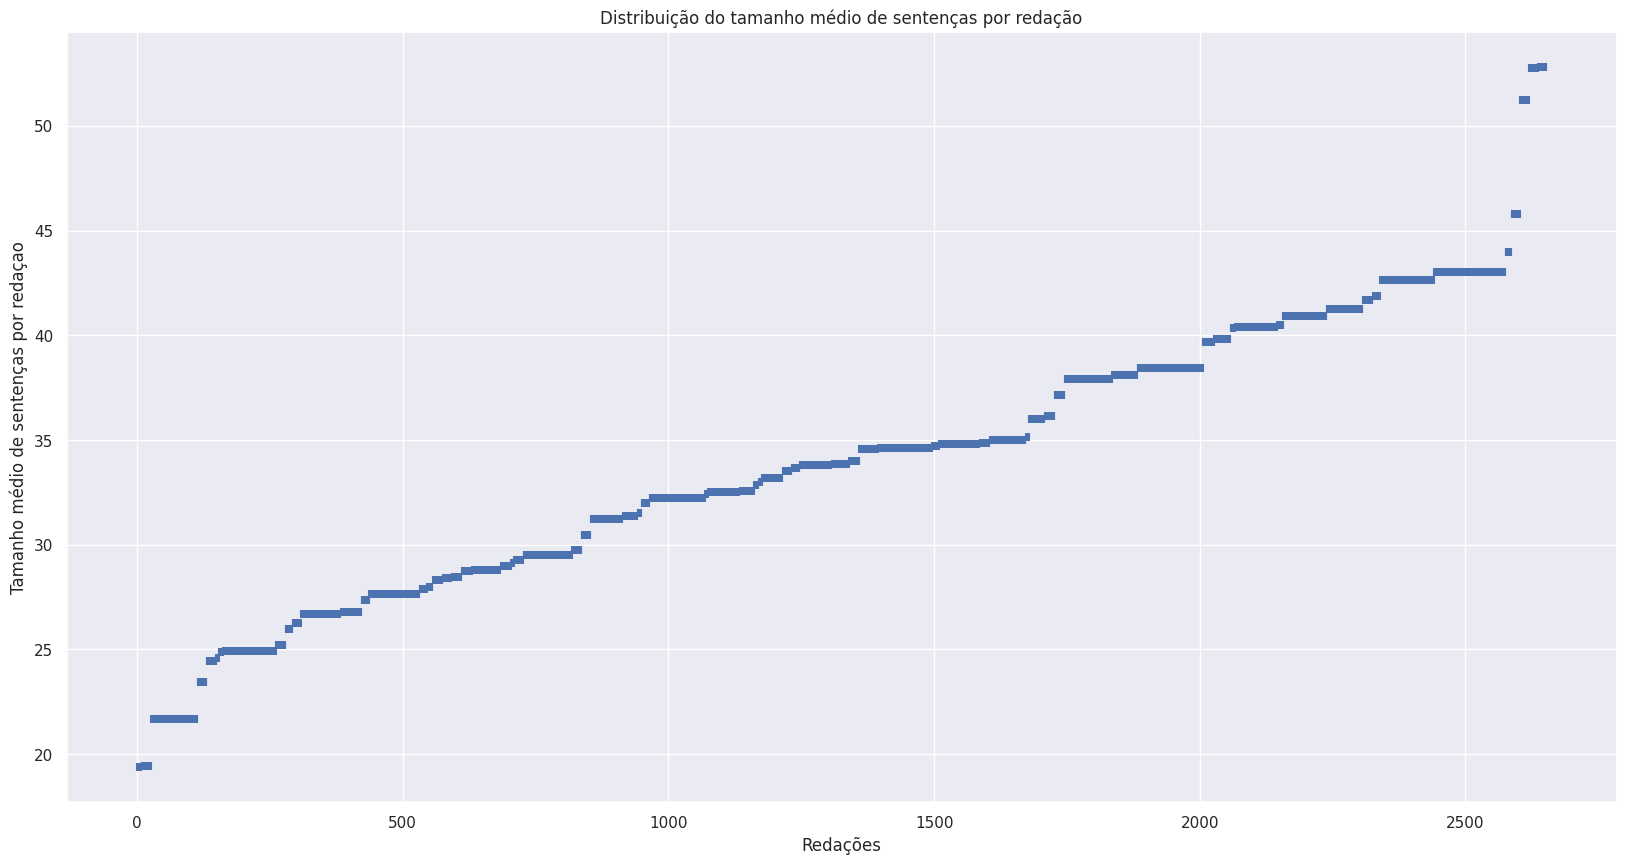

In [65]:
sns.set(style="darkgrid")

plt.rcParams["figure.figsize"] = (20,10)

plt.scatter(range(0, len(df['avg_len_sentencas_redacao'])), sorted(df['avg_bert_tokens_sentencas_texto_motivador']), marker="|")

# Adiciona os valores as colunas
# for p in ax.patches:
#     ax.annotate(f"{p.get_height()}", (p.get_x()+0.3, p.get_height()+0.2))

plt.title("Distribuição do tamanho médio de sentenças por redação")
plt.xlabel("Redações")
plt.ylabel("Tamanho médio de sentenças por redaçao")
plt.show()

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2653 entries, 38 to 6453
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   id                                         2653 non-null   int64  
 1   redacao                                    2653 non-null   object 
 2   nota_competencia_2                         2653 non-null   int64  
 3   nota_geral                                 2653 non-null   int64  
 4   tema                                       2653 non-null   object 
 5   texto_motivador                            2653 non-null   object 
 6   categoria                                  2653 non-null   object 
 7   sentencas_redacao                          2653 non-null   object 
 8   sentencas_texto_motivador                  2653 non-null   object 
 9   qtd_sentencas_redacao                      2653 non-null   int64  
 10  qtd_sentencas_texto_mot

# Wordcloud por categoria filtrada

# Filtra registros por tema para gerar word cloud

Lista de valores possíveis para categoria:
- sociedade e cultura
- segurança
- saúde
- política
- meio ambiente
-educação
- economia
- ciência e tecnologia

In [67]:
df_s = df[df.categoria == 'ciência e tecnologia']
df_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 208 to 6435
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   id                                         51 non-null     int64  
 1   redacao                                    51 non-null     object 
 2   nota_competencia_2                         51 non-null     int64  
 3   nota_geral                                 51 non-null     int64  
 4   tema                                       51 non-null     object 
 5   texto_motivador                            51 non-null     object 
 6   categoria                                  51 non-null     object 
 7   sentencas_redacao                          51 non-null     object 
 8   sentencas_texto_motivador                  51 non-null     object 
 9   qtd_sentencas_redacao                      51 non-null     int64  
 10  qtd_sentencas_texto_moti

In [68]:
from wordcloud import WordCloud, STOPWORDS

## Wordcloud do tema

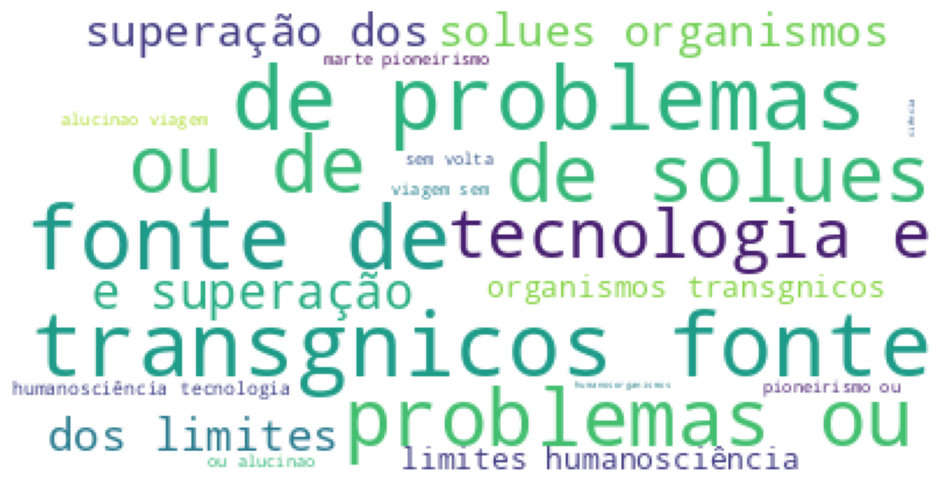

In [69]:
wordcloud_tema = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(''.join([str(x) for x in df_s['tema']]))

plt.rcParams["figure.figsize"] = (12,8)
plt.imshow(wordcloud_tema)
plt.axis("off")
plt.show()

## Wordcloud dos textos motivadores

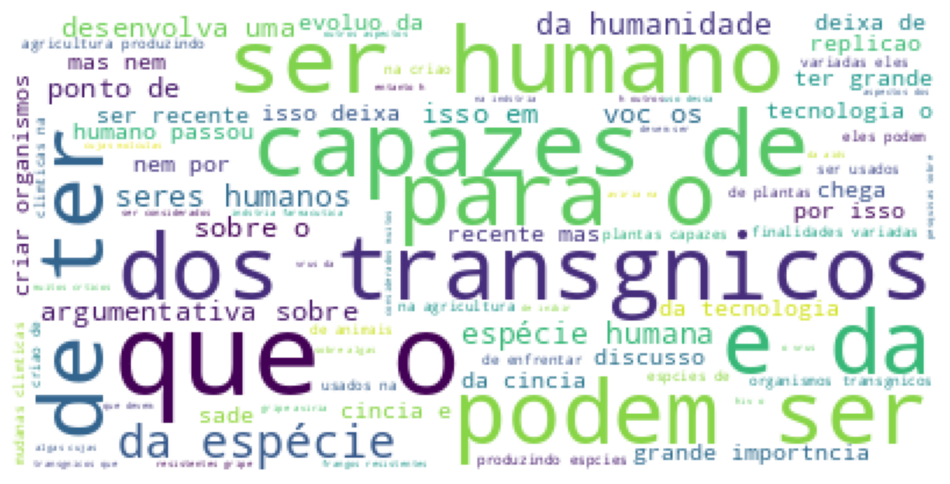

In [70]:
wordcloud_tema = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(''.join([str(x) for x in df_s['texto_motivador']]))

plt.rcParams["figure.figsize"] = (12,8)
plt.imshow(wordcloud_tema)
plt.axis("off")
plt.show()

## Wordcloud das redações

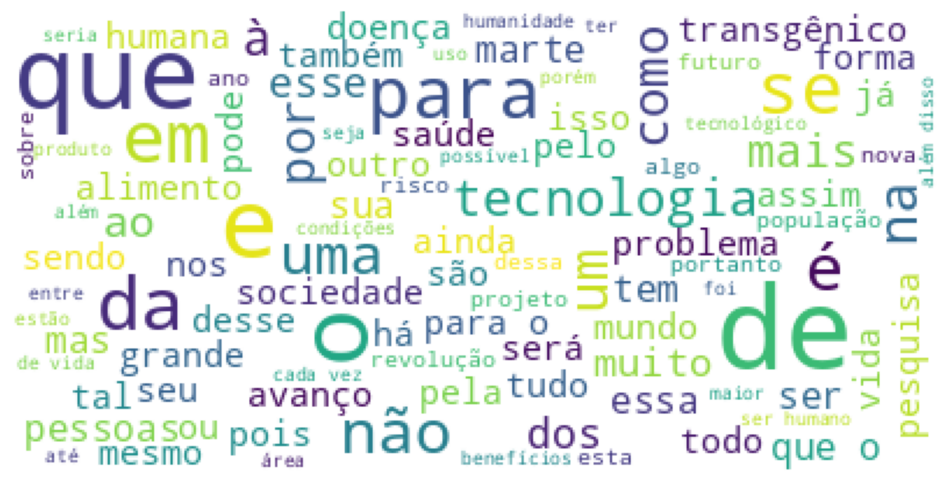

In [71]:
wordcloud_tema = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(''.join([str(x) for x in df_s['redacao']]))

plt.rcParams["figure.figsize"] = (12,8)
plt.imshow(wordcloud_tema)
plt.axis("off")
plt.show()